<a href="https://colab.research.google.com/github/yumeniown/Software-Engineering-IT-Leaders-of-the-Future/blob/main/%D0%98%D0%BD%D1%81%D1%82%D1%80%D1%83%D0%BC%D0%B5%D0%BD%D1%82%D1%8B_%D0%B2%D0%B8%D0%B7%D1%83%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8_matplotlib%2C_seaborn%2C_bokeh%2C_%D1%87_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Визуализация данных

## <center> Графические возможности библиотеки pandas

In [ ]:
# импортируем библиотеки
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')
# cwd = os.getcwd()
# print(cwd)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# данные о показателях заболеваемости за каждый день в различных регионах 187 стран
covid_data = pd.read_csv('drive/MyDrive/covid_data.csv')
covid_data.head()

,date,province/state,country,confirmed,deaths,recovered
0,01/22/2020,Anhui,China,1.0,0.0,0.0
1,01/22/2020,Beijing,China,14.0,0.0,0.0
2,01/22/2020,Chongqing,China,6.0,0.0,0.0
3,01/22/2020,Fujian,China,1.0,0.0,0.0
4,01/22/2020,Gansu,China,0.0,0.0,0.0


* date — дата наблюдения;
* province/state — наименование провинции/штата;
* country — наименование страны;
* confirmed — общее число зафиксированных случаев на указанный день;
* deaths — общее число зафиксированных смертей на указанный день;
* recovered — общее число выздоровлений на указанный день.

In [ ]:
# данные о процессе вакцинирования людей в 221 стране мира
vaccinations_data = pd.read_csv('drive/MyDrive/country_vaccinations.csv')
vaccinations_data = vaccinations_data[
    ['country', 'date', 'total_vaccinations',
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']
]
vaccinations_data.head()

,country,date,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
0,Afghanistan,2021-02-22,0.0,0.0,0.0,NaN,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
1,Afghanistan,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
2,Afghanistan,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
3,Afghanistan,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
4,Afghanistan,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."


* country — наименование страны;
* date — дата наблюдения;
* total_vaccinations — общее число введённых вакцин в стране на указанный день;
* people_vaccinated — общее число привитых первым компонентом в стране на указанный день;
* people_vaccinated_per_hundred — процент привитых первым компонентом в стране на указанный день
* people_fully_vaccinated — общее число привитых вторым компонентом в стране на указанный день (первый компонент уже был введён им ранее);
* people_fully_vaccinated_per_hundred — процент привитых вторым компонентом в стране на указанный день
* daily_vaccination — ежедневная вакцинация (число вакцинированных в указанный день);
* vaccines — комбинации вакцин, используемые в стране.

In [ ]:
# Группируем таблицу по дате и названию страны и рассчитываем суммарные показатели по всем регионам.
# Тем самым переходим от данных по регионам к данным по странам
covid_data = covid_data.groupby(
    ['date', 'country'],
    as_index=False
)[['confirmed', 'deaths', 'recovered']].sum()

In [ ]:
covid_data.head()

,date,country,confirmed,deaths,recovered
0,01/01/2021,Afghanistan,51526.0,2191.0,41727.0
1,01/01/2021,Albania,58316.0,1181.0,33634.0
2,01/01/2021,Algeria,99897.0,2762.0,67395.0
3,01/01/2021,Andorra,8117.0,84.0,7463.0
4,01/01/2021,Angola,17568.0,405.0,11146.0


In [ ]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86785 entries, 0 to 86784
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       86785 non-null  object 
 1   country    86785 non-null  object 
 2   confirmed  86785 non-null  float64
 3   deaths     86785 non-null  float64
 4   recovered  86785 non-null  float64
dtypes: float64(3), object(2)
memory usage: 3.3+ MB


In [ ]:
covid_data['date'] = pd.to_datetime(covid_data['date'])

In [ ]:
covid_data.head()

,date,country,confirmed,deaths,recovered
0,2021-01-01,Afghanistan,51526.0,2191.0,41727.0
1,2021-01-01,Albania,58316.0,1181.0,33634.0
2,2021-01-01,Algeria,99897.0,2762.0,67395.0
3,2021-01-01,Andorra,8117.0,84.0,7463.0
4,2021-01-01,Angola,17568.0,405.0,11146.0


In [ ]:
# Создадим признак больных на данный момент (active).
# Для этого вычтем из общего числа зафиксированных случаев число смертей и число выздоровевших пациентов:
covid_data['active'] = covid_data['confirmed'] - covid_data['deaths'] - covid_data['recovered']

In [ ]:
# Создадим признак ежедневного прироста числа заболевших, умерших и выздоровевших людей.
# Для этого отсортируем данные по названиям стран, а затем по датам. После этого произведём
# группировку по странам и рассчитаем разницу между «вчера и сегодня» с помощью метода diff():
covid_data = covid_data.sort_values(by=['country', 'date'])
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()

In [ ]:
covid_data[400:420]

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered
22439,2021-03-30,Afghanistan,56384.0,2476.0,51473.0,2435.0,62.0,4.0,807.0
22816,2021-03-31,Afghanistan,56454.0,2484.0,51550.0,2420.0,70.0,8.0,77.0
23193,2021-04-01,Afghanistan,56517.0,2489.0,51788.0,2240.0,63.0,5.0,238.0
23571,2021-04-02,Afghanistan,56572.0,2495.0,51798.0,2279.0,55.0,6.0,10.0
23949,2021-04-03,Afghanistan,56595.0,2496.0,51802.0,2297.0,23.0,1.0,4.0
24327,2021-04-04,Afghanistan,56676.0,2497.0,51885.0,2294.0,81.0,1.0,83.0
24706,2021-04-05,Afghanistan,56717.0,2508.0,51902.0,2307.0,41.0,11.0,17.0
25086,2021-04-06,Afghanistan,56779.0,2512.0,51928.0,2339.0,62.0,4.0,26.0
25466,2021-04-07,Afghanistan,56873.0,2512.0,51940.0,2421.0,94.0,0.0,12.0
25846,2021-04-08,Afghanistan,56943.0,2516.0,51956.0,2471.0,70.0,4.0,16.0


In [ ]:
vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])

In [ ]:
covid_df = covid_data.merge(vaccinations_data, on=['date', 'country'], how='left')

In [ ]:
covid_df[20200:20210]

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
20200,2021-02-25,Czech Republic,1198168.0,19835.0,1046575.0,131758.0,13816.0,153.0,9145.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20201,2021-02-26,Czech Republic,1212780.0,19999.0,1055083.0,137698.0,14612.0,164.0,8508.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20202,2021-02-27,Czech Republic,1227595.0,20194.0,1064022.0,143379.0,14815.0,195.0,8939.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20203,2021-02-28,Czech Republic,1235480.0,20339.0,1067557.0,147584.0,7885.0,145.0,3535.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20204,2021-03-01,Czech Republic,1240051.0,20469.0,1070622.0,148960.0,4571.0,130.0,3065.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20205,2021-03-02,Czech Republic,1252242.0,20701.0,1082617.0,148924.0,12191.0,232.0,11995.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20206,2021-03-03,Czech Republic,1269058.0,20941.0,1093537.0,154580.0,16816.0,240.0,10920.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20207,2021-03-04,Czech Republic,1284288.0,21128.0,1104592.0,158568.0,15230.0,187.0,11055.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20208,2021-03-05,Czech Republic,1299002.0,21325.0,1115172.0,162505.0,14714.0,197.0,10580.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20209,2021-03-06,Czech Republic,1312164.0,21558.0,1126420.0,164186.0,13162.0,233.0,11248.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Создадим признаки death_rate — общий процент смертей среди зафиксированных случаев (летальность) и
# recover_rate — общий процент случаев выздоровления. Данные характеристики рассчитаем как отношение числа смертей
#  (deaths) и числа выздоровлений (recovered) к числу зафиксированных случаев (confirmed) и умножьте результаты на 100%.
covid_df['death_rate'] = covid_df['deaths'] / covid_df['confirmed'] * 100
covid_df['recover_rate'] = covid_df['recovered'] / covid_df['confirmed'] * 100

In [ ]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86785 entries, 0 to 86784
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   date                                 86785 non-null  datetime64[ns]
 1   country                              86785 non-null  object        
 2   confirmed                            86785 non-null  float64       
 3   deaths                               86785 non-null  float64       
 4   recovered                            86785 non-null  float64       
 5   active                               86785 non-null  float64       
 6   daily_confirmed                      86564 non-null  float64       
 7   daily_deaths                         86564 non-null  float64       
 8   daily_recovered                      86564 non-null  float64       
 9   total_vaccinations                   10629 non-null  float64       
 10  people_vac

In [ ]:
#используем объединенный датасет о заболеваемости и вакцинации
covid_df.head()

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines,death_rate,recover_rate
0,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
4,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


Основным методом для создания простейших графиков в Pandas является метод plot(). Разберем его основные параметры:
* x - название признака, который будет отложен по оси абсцисс
* y - название признака, который будет отложен по оси ординат
* figsize - размер графика (кортеж из ширины и высоты в дюймах)
* **kind** - тип визуализации. Основные типы:
    * 'line' - линейный график (стоит по умолчанию)
    * 'bar' - столбчатая диаграмма
    * 'barh' - горизонтальная столбчатая диаграмма
    * 'hist' - гистограмма
    * 'box' - коробчатая диаграмма (boxplot)
    * 'pie' - круговая диаграмма
    * 'scatter' - диаграмма рассеяния
* grid - отображение сетки (по умолчанию False)
* legend - отображение легенды (по умолчанию False)
* title - название графика
* color - цвет


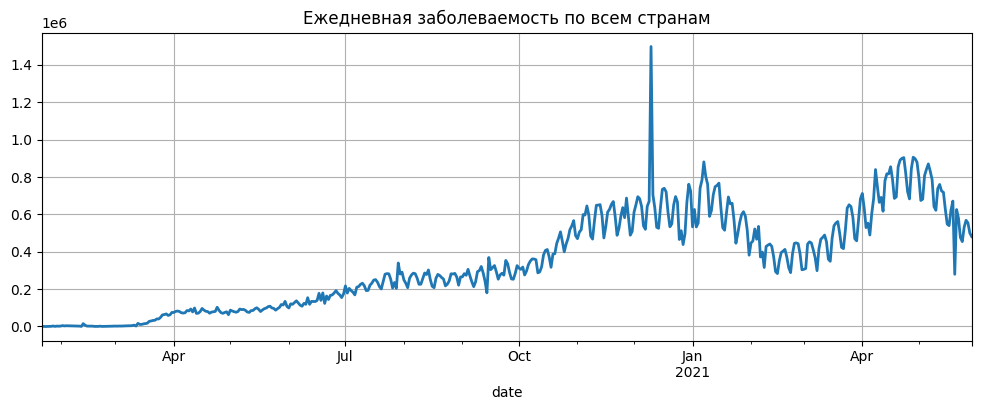

In [ ]:
grouped_cases = covid_df.groupby('date')['daily_confirmed'].sum()
grouped_cases.plot(
    kind='line',
    figsize=(12, 4),
    title='Ежедневная заболеваемость по всем странам',
    grid = True,
    lw=2
);

**Выводы по графику:** на графике отчетливо виден умеренный начальный рост заболеваемости, после чего наблюдается ее резкое повышение в середине октября 2020, а в декабре 2020 года вспышка коронавируса (зафиксировано более 1.4 млн заболевших в день). После чего наблюдается постепенное уменьшение числа ежедневно фиксированных случаев и наступление второй волны в марте 2021. Наконец, начиная с мая 2021 наблюдается очередной спад.

Пилообразность графика - подъемы и спады с периодом в 7 дней - могут быть связаны с рабочими и выходными днями.
Нам неизвестно, как  устроен во времени процесс постановки диагноза и сбора статистики и отличается ли он в разных странах. Можно предположить, что спад в выходные обусловлен меньшей интенсивностью работы медицинских служб. Также можно предположить, что в тех случаях, когда диагноз ставится по результатам анализа, если в выходные берется/проводится меньше тестов, к понедельнику они еще не готовы и диагноз еще не поставлен. Также можем предположить, что минимум в понедельник может быть запаздыванием подсчета статистики, т.е. на самом деле данные за понедельник - это данные за воскресенье


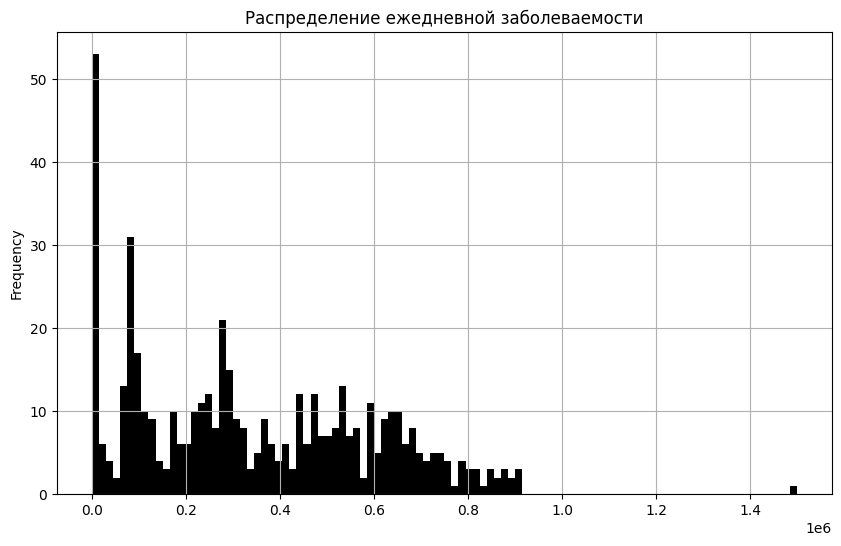

In [ ]:
grouped_cases = covid_df.groupby('date')['daily_confirmed'].sum()
grouped_cases.plot(
    kind='hist',
    figsize=(10, 6),
    title='Распределение ежедневной заболеваемости',
    grid = True,
    color = 'black',
    bins=100
);

**Выводы по графику:** по гистограмме можно судить о частоте попадания ежедневной заболеваемости в определенный интервал. На оси абсцисс отложен диапазон ежедневной заболеваемости (в млн. человек), разбитый на 10 равных интервалов. На оси ординат - число наблюдений, попавших в этот интервал.

Во-первых, мы видим модальное значение близ нуля (от 0 до примерно 150 тыс. заболеваний в день), т.е. большинство наблюдений сосредоточено в первом интервале, далее частота постепенно падает. Это связано с тем, что долгое время распространение вируса было довольно слабым.

Во-вторых, в глаза бросается "пенёк", который соответствует резкой вспышке заболеваемости, которую мы видели ранее, его высота очень мала, ведь такое наблюдение единственно. Даже на гистограмме кажется, что данное наблюдение является аномальным и скорее всего является выбросом.

In [ ]:
grouped_country = covid_df.groupby(['country'])['confirmed'].last()
grouped_country

country
Afghanistan                        70111.0
Albania                           132297.0
Algeria                           128456.0
Andorra                            13693.0
Angola                             34180.0
                                    ...   
West Bank and Gaza                307838.0
Yemen                               6731.0
Zambia                             94751.0
Zimbabwe                           38933.0
occupied Palestinian territory         0.0
Name: confirmed, Length: 221, dtype: float64

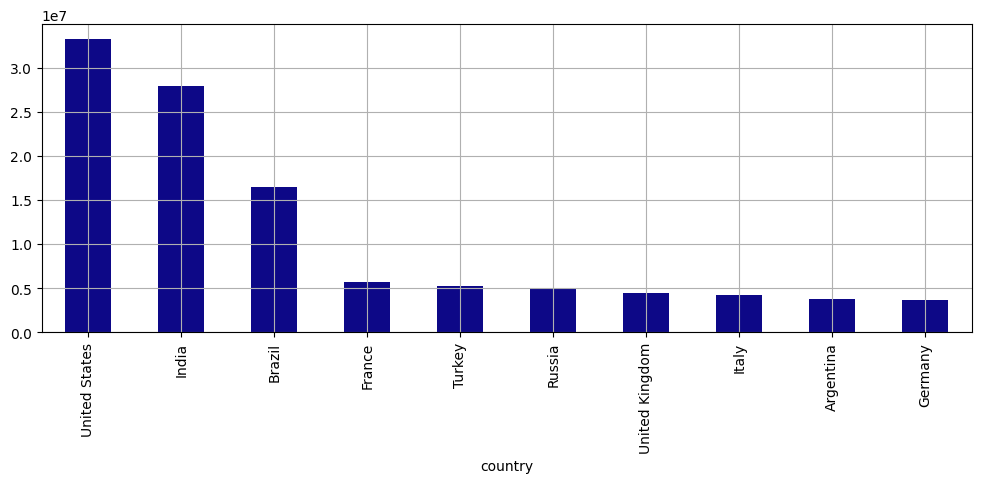

In [ ]:
grouped_country = covid_df.groupby(['country'])['confirmed'].last()
grouped_country = grouped_country.nlargest(10)
grouped_country.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    colormap='plasma'
);

**Выводы по графику:** на диаграмме видно, что лидерами по числу заболевших являются Соединенные Штаты, Индия и Бразилия. Соотношение зафиксированных случаев заражения в остальных странах примерно одинаково.

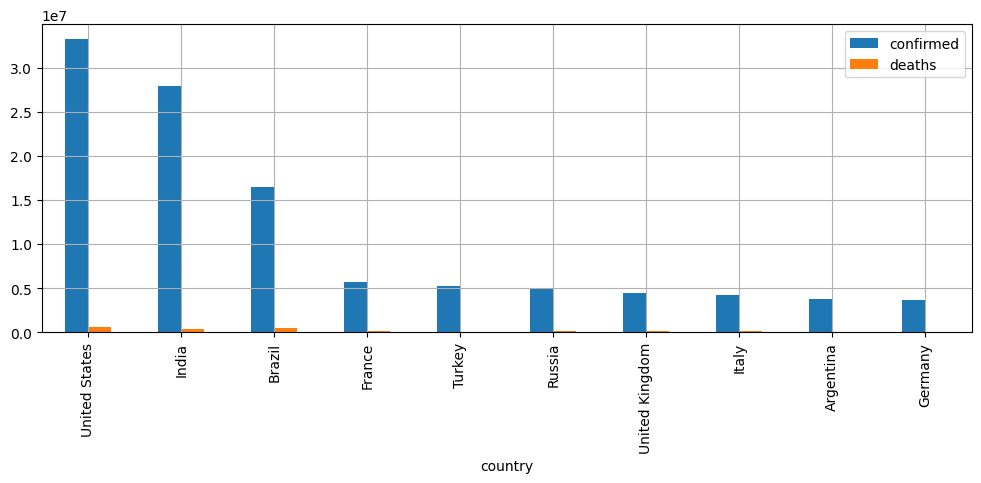

In [ ]:
grouped_country = covid_df.groupby(['country'])[['confirmed', 'deaths']].last()
grouped_country = grouped_country.nlargest(10, columns=['confirmed'])
grouped_country.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    legend=True
);

**Выводы по графику:** график является небольшим усовершенствованием предыдущего. Теперь на графике можно увидеть соотношение числа зафиксированных случаев и смертей.
Очевидно, что отношение числа умерших к числу заболевших весьма низкое. Также это косвенно может говорить о разных методиках учёта заболевших (например, какие-то страны могут учитывать заболевших только по мазку, в то время как другие- по клинической картине, учитывающей и другие показатели). Это с методической точки зрения учёт по числу заражений может быть не совсем корректным. Лучшим показателем будет являться число смертей (хотя и этот метод не идален).


Визуализация с помощью Pandas является удобным инструментом, когда графики необходимо построить "здесь и сейчас", не сильно заморачиваясь над их внешним видом. Однако, такой подход имеет значительный минус по сравнению с использованием специализированных библиотек для визуализации - довольно ограниченный функционал:
* С помощью Pandas можно построить лишь базовый набор диаграмм. Для построения более сложных видов визуализации он не подходит
* Трудно настроить визуализацию нескольких видов графиков одновременно в разных масштабах
* Сложно или иногда даже невозможно корректировать внешний вид графика
* Отсутствует 3D визуализация


## <center> Графические возможности библиотеки matplotlib

In [ ]:
# Matplotlib - это библиотека Python, обладающая большим количеством возможностей для визуализации и настройки отображения графиков и диаграмм.

#!pip install matplotlib

# За визуализацию графиков в matplotlib отвечает модуль pyplot. Традиционно он импортируется под псевдонимом plt.
#  К тому же для более корректного отображения графиков в Jupiter используется команда %matplotlib inline
import matplotlib.pyplot as plt
%matplotlib inline

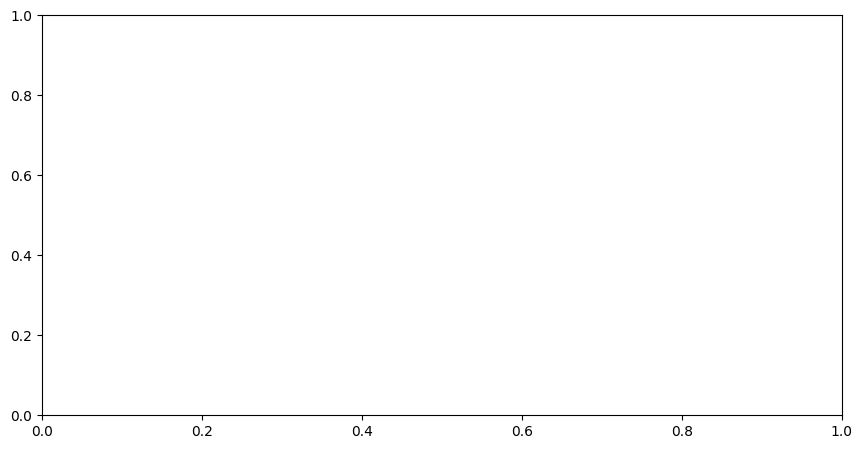

In [ ]:
# Библиотека позволяет работать в нескольких режимах. Самый распространенный и мощный по функционалу - объектно-ориентированный режим.
# Он основан на работе с объектами фигур (figure), их еще называют канвасами или холстами, и координатных плоскостей (axes) или системы координат.
fig = plt.figure(figsize=(8, 4))
ax = fig.add_axes([0, 0, 1, 1])

Утверждается, что коллективная вакцинация позволяет минимизировать риск заражения коронавирусной инфекцией (но только после второго компонента). Давайте проверим это на примере США: построим диаграмму рассеяния, которая покажет зависимость числа ежедневно обнаруживаемых случаев заражения (daily_confirmed) от общего количества привитых вторым компонентом вакцины (people_fully_vaccinated) в США.

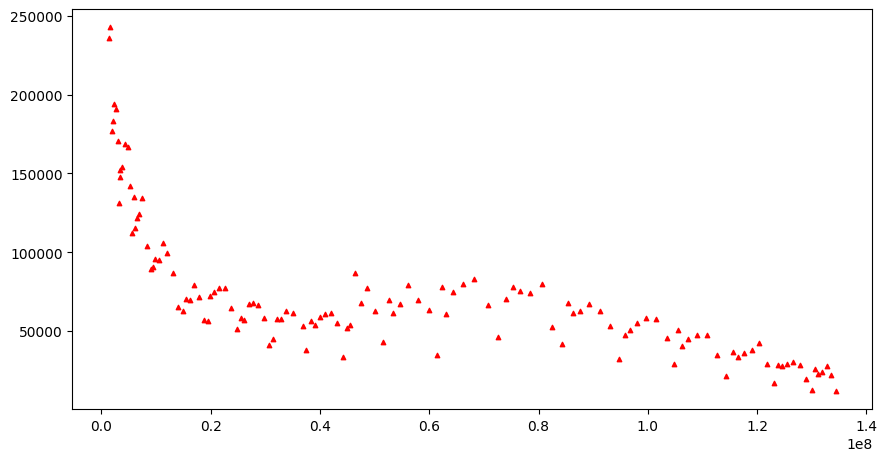

In [ ]:
us_data = covid_df[covid_df['country'] == 'United States']

fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(
    x=us_data['people_fully_vaccinated'],
    y=us_data['daily_confirmed'],
    s=10,
    marker='^',
    c = 'red'
);

* x, y — последовательности, которые будут отложены по осям абсцисс и ординат;
* s — размер маркеров;
* marker — вид маркеров ('o' — точки, '^' — треугольники);
* c — цвет маркеров.

Из диаграммы видно, что, в основном, с ростом числа привитых вторым компонентом людей заболеваемость падает, замедляясь на уровне около 50 тысяч заболевших в день, и продолжает снижение дальше.



Построим круговую диаграмму, чтобы отобразить ТОП-10 комбинаций вакцин в мире.

In [ ]:
covid_df['vaccines'].value_counts()

vaccines
Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech    3059
Oxford/AstraZeneca                                               1340
Moderna, Oxford/AstraZeneca, Pfizer/BioNTech                     1293
Oxford/AstraZeneca, Sinopharm/Beijing                            1280
Oxford/AstraZeneca, Pfizer/BioNTech                              1082
                                                                 ... 
Sputnik V                                                          62
Oxford/AstraZeneca, Sputnik V, ZF2001                              60
Moderna, Oxford/AstraZeneca, Sinovac                               23
Covaxin, Oxford/AstraZeneca                                        18
Abdala, Soberana02                                                 12
Name: count, Length: 63, dtype: int64

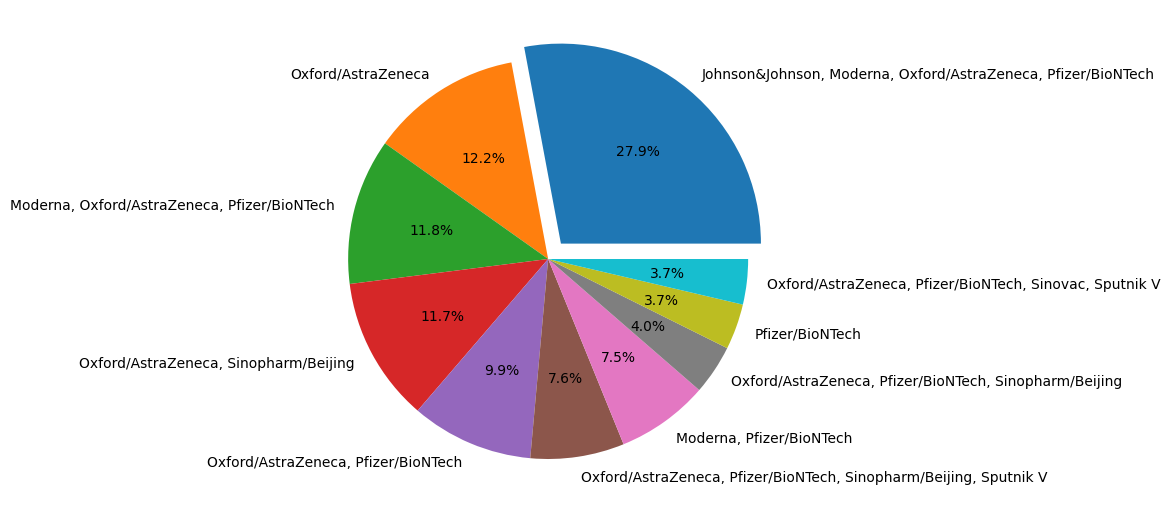

In [ ]:
vaccine_combinations = covid_df['vaccines'].value_counts()[:10]
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    vaccine_combinations,
    labels=vaccine_combinations.index,
    autopct='%.1f%%',
    explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
);

* x — значения, по которым будет строиться круговая диаграмма;
* labels — метки, соответствующие значениям;
* autopct — формат отображения долей на диаграмме (например, '%.1f%%' означает, что округление будет производиться до первого знака после запятой и при выводе будет указан знак "%"; открывающий и закрывающий проценты означают форматирование, а внутренний — вывод знака "%");
* explode — последовательность, которая определяет долю смещения сектора от центра для каждого значения из x.

Самой распространённой комбинацией вакцин является комбинация: Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech. Причём можно заметить, что в большинстве популярных комбинаций присутствует вакцина Oxford/AstraZeneca.

Вы наверное заметили, что до этого мы не подписывали графики. График не имеет смысла, если без лишних слов непонятно, что на нем изображено. Управлять информативностью графика можно с помощью методов координатной плоскости axes. Перечислим основные из них (не пугайтесь, запоминать их не обязательно, вы всегда сможете подсмотреть их в документации):

* axes.set_title() - заголовок диаграммы, а также его настройки (например, параметр fontsize отвечает за размер шрифта)
* axes.set_xlabel() - название оси абсцисс
* axes.set_ylabel() - название оси ординат
* axes.set_xticks() - установка отметок на оси абсцисс
* axes.set_yticks() - установка отметок на оси ординат
* axes.xaxis.set_tick_params() - управление параметрами отметок на оси абсцисс (например, параметр rotation отвечает за поворот отметок в градусах)
* axes.yaxis.set_tick_params()  - управление параметрами отметок на оси ординат
* axes.legend() - отображение легенды
* axes.grid() - установка сетки

изобразим на одном графике, как росла общая заболеваемость (confirmed), число зафиксированных смертей (deaths), выздоровевших пациентов (recovered) и активных случаев (active) в Китае.

Для построения линейных графиков в Matplotlib используется метод plot() (не путайте с методом plot() в Pandas!). При вызове метода без параметров по оси ординат откладываются значения столбца таблицы, по оси абсцисс — индексы (в нашем случае это будут даты).

Дополнительно в параметрах метода указываем параметр label — название графика, которое будет отображаться на легенде, а также lw — ширину линии графика. Добавим к графику заголовок, названия осей, установим метки по оси y с частотой в 10 000, повернём метки по оси x на 30 градусов, а также добавим легенду (метки для легенды выставляются в параметре label метода plot()):

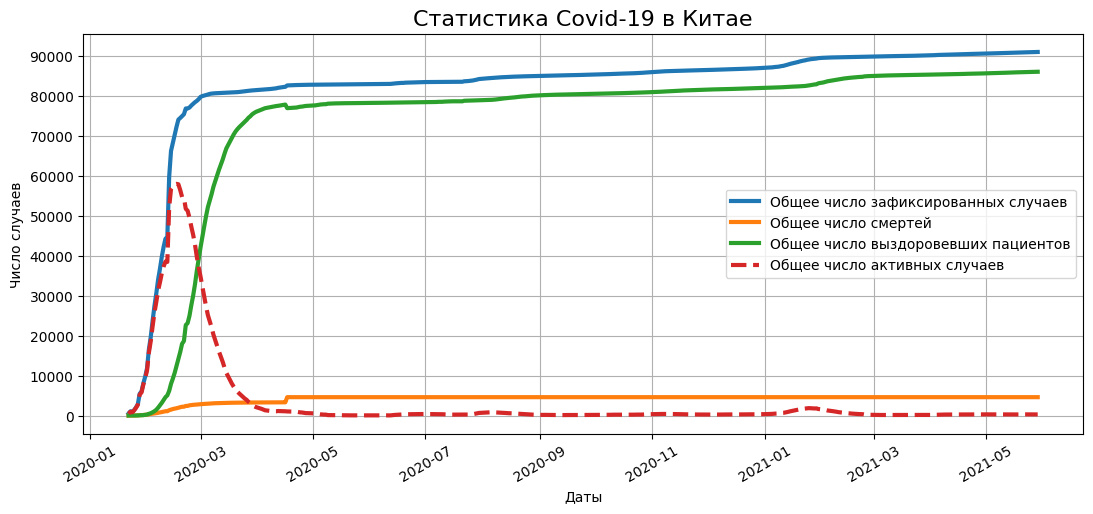

In [ ]:
china_data = covid_df[covid_df['country'] == 'China'].sort_values(by='date')
china_grouped = china_data.groupby(['date'])[['confirmed', 'active', 'deaths', 'recovered']].sum()

#визуализация графиков
fig = plt.figure(figsize=(10, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(china_grouped['confirmed'], label='Общее число зафиксированных случаев', lw=3)
axes.plot(china_grouped['deaths'], label='Общее число смертей', lw=3)
axes.plot(china_grouped['recovered'], label='Общее число выздоровевших пациентов', lw=3)
axes.plot(china_grouped['active'], label='Общее число активных случаев', lw=3, linestyle='dashed')

#установка параметров отображения
axes.set_title('Статистика Covid-19 в Китае', fontsize=16)
axes.set_xlabel('Даты')
axes.set_ylabel('Число случаев')
axes.set_yticks(range(0, 100000, 10000))
axes.xaxis.set_tick_params(rotation=30)
axes.grid()
axes.legend();

На графике наблюдается резкий рост заболеваемости на начальном периоде до середины февраля 2020 года, после чего видно резкое падение числа активных случаев (примерно в этот период власти Китая ввели тотальный локдаун и прекратили транспортное сообщение со всем миром). Далее число активных случаев только падает, а темп прироста числа заболевших снижается. При этом общее число смертей в Китае остаётся практически на одном уровне (около 5 тысяч), уже начиная с мая 2020 года (новые пациенты умирают крайне редко).

Стоит обратить внимание сдвиги в графиках. Они являются свидетельством противоречия в данных: общее число выздоровевших пациентов почему-то резко упало, а число умерших возросло. Почему так произошло? Произошёл пересчёт числа заболевших? Данные были утеряны или искажены? Если вы в своей практике столкнётесь с такими же противоречиями, вам необходимо будет обратиться к первоисточнику, чтобы выяснить причину.

При использовании библиотеки Matplotlib вовсе не обязательно ограничиваться одной системой координат.

отобразим ТОП-5 стран по общему числу привитых вторым компонентом людей (people_fully_vaccinated), а также ТОП-5 стран по числу полностью привитых на 100 человек населения (people_fully_vaccinated_per_hundred).

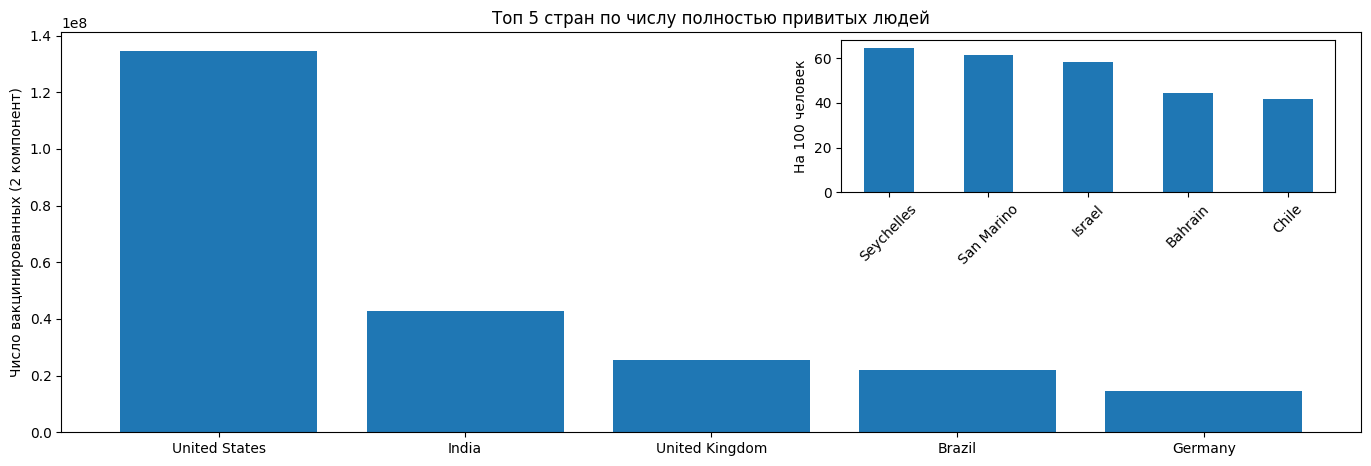

In [ ]:
vacc_country = covid_df.groupby('country')['people_fully_vaccinated'].last().nlargest(5)
vacc_country_per_hundred = covid_df.groupby('country')['people_fully_vaccinated_per_hundred'].last().nlargest(5)

#визуализация главного графика
fig = plt.figure(figsize=(13, 4))
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.bar(
    x = vacc_country.index,
    height = vacc_country,
    );
main_axes.set_ylabel('Число вакцинированных (2 компонент)')
main_axes.set_title('Топ 5 стран по числу полностью привитых людей')

#визуализация вспомогательного графика
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(
    x = vacc_country_per_hundred.index,
    height = vacc_country_per_hundred,
    width=0.5
    );
insert_axes.set_ylabel('На 100 человек')
insert_axes.xaxis.set_tick_params(rotation=45)

* x — названия категорий, которые будут располагаться по оси абсцисс;
height — высота столбцов диаграммы, массив из показателей для визуализации (например, среднее, максимальное значение и т. д.);
* width — ширина столбцов диаграммы;
* color — цвет.

Нетрудно заметить, что два представленных рейтинга отличаются: лидером по числу полностью привитых является США, а вот по числу вакцин на 100 человек населения — Сейшелы. В первый список попали страны с большим количеством населения, которое они активно прививают. Во второй список попали маленькие страны, которые проще всего обеспечить вакциной.

В наш ТОП не попали страны, которые пользуются однокомпонентной вакциной, например Китай.

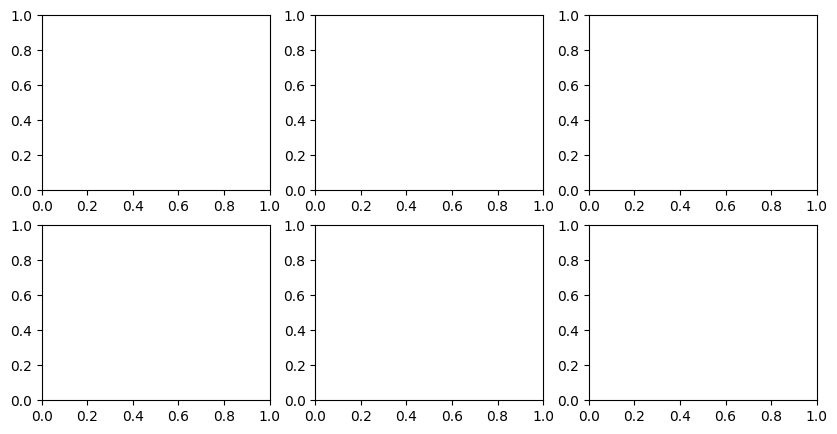

In [ ]:
# Создание дополнительных систем координат с помощью метода add_axes() полезно, однако используется не так часто.
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))

Теперь построим три графика:

* Столбчатую диаграмму, которая покажет динамику ежедневной вакцинации в России.
* Линейный график изменения ежедневной заболеваемости в стране.
* Гистограмму ежедневной заболеваемости в стране.

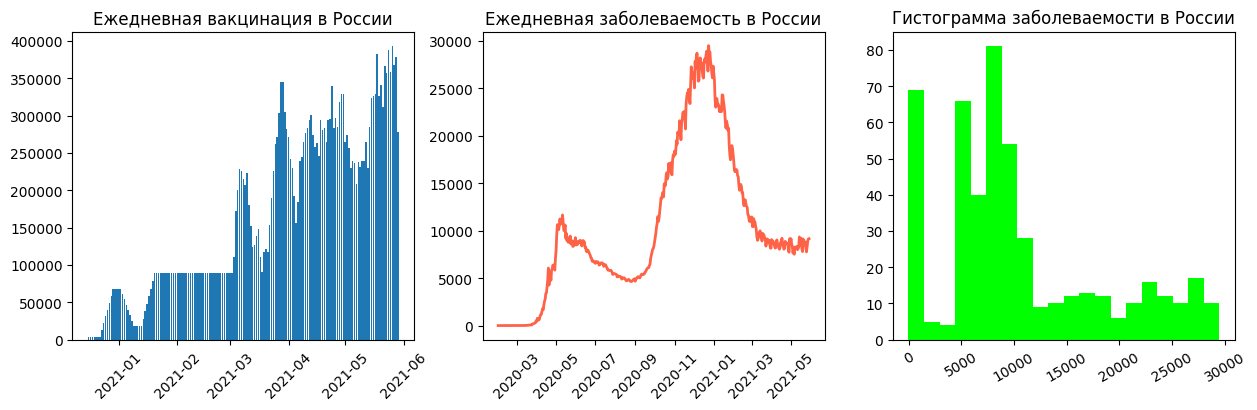

In [ ]:
russia_data = covid_df[covid_df['country'] == 'Russia']

#визуализация систем координат
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
#столбчатая диаграмма
axes[0].bar(x=russia_data['date'],
            height=russia_data['daily_vaccinations'],
            label='Число вакцинированных')
axes[0].set_title('Ежедневная вакцинация в России')
axes[0].xaxis.set_tick_params(rotation=45)

#линейный график
axes[1].plot(russia_data['date'],
             russia_data['daily_confirmed'],
             label='Число заболевших',
             color='tomato', lw=2)
axes[1].set_title('Ежедневная заболеваемость в России')
axes[1].xaxis.set_tick_params(rotation=45)

#гистограмма
axes[2].hist(x=russia_data['daily_confirmed'],
             label=['Число заболевших'],
             color='lime', bins = 20)
axes[2].set_title('Гистограмма заболеваемости в России');
axes[2].xaxis.set_tick_params(rotation=30)

На первом графике можно наблюдать колеблющийся рост числа ежедневно вакцинированных людей. Особенно в глаза бросается «пенёк» в период с конца января до начала марта 2021 года. Это период, когда данные о процессе вакцинации людей не обновлялись.

На втором графике мы видим две волны коронавируса в России. Первая — в середине марта 2020 года, которая достигла максимума в 13 тысяч заболевших за сутки. Вторая волна, судя по графику, началась в октябре 2020 года и достигла своего пика почти в 30 тысяч заболевших за сутки в конце декабря этого же года (точные данные: 24 декабря было зафиксировано рекордное число подтверждённых случаев: 29935).

Далее с ростом показателей вакцинации и введением новых карантинных мер заболеваемость снова постепенно снижается.

На третьем графике можно увидеть, что большая часть наблюдений ежедневной заболеваемости находится в интервале от 5 до до 10 тысяч человек в день. Ещё один пик гистограммы находится около 0 — это случаи, зафиксированные на начальных этапах эпидемии (в Россию Covid-19 пришёл позже, чем во многие другие страны).

## <center> Графические возможности библиотеки seaborn

In [ ]:
# Seaborn - надстройка над библиотекой matplotlib, которая значительно расширяет ее возможности, позволяя создавать графики
# более высокого уровня с приятным для глаза оформлением. Библиотека дает большое количество дополнительных возможностей для
# творчества при визуализации данных.
#!pip install seaborn
# Традиционно seaborn импортируется под псевдонимом sns:
import seaborn as sns
import matplotlib.pyplot as plt
sns.__version__

'0.13.1'

В данном разделе мы будем сравнивать несколько стран: Россию, Австралию, Германию, Канаду и Великобританию. Создадим специальный DataFrame croped_covid_df для этих данных.
Для того, чтобы показатели по странам стали сопоставимы: добавим информацию о населении стран, чтобы рассчитать ежедневную заболеваемость на 100 человек населения (заболеваемость в процентах от населения):


In [ ]:
countries = ['Russia', 'Australia', 'Germany', 'Canada', 'United Kingdom']
croped_covid_df = covid_df[covid_df['country'].isin(countries)]

populations = pd.DataFrame([
    ['Canada', 37664517],
    ['Germany', 83721496],
    ['Russia', 145975300],
    ['Australia', 25726900],
    ['United Kingdom', 67802690]
    ],
    columns=['country', 'population']
)
croped_covid_df = croped_covid_df.merge(populations, on=['country'])
croped_covid_df['daily_confirmed_per_hundred'] = croped_covid_df['daily_confirmed'] / croped_covid_df['population'] * 100
croped_covid_df.head()

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines,death_rate,recover_rate,population,daily_confirmed_per_hundred
0,2020-01-23,Australia,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25726900,NaN
1,2020-01-25,Australia,4.0,0.0,0.0,4.0,4.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000016
2,2020-01-26,Australia,4.0,0.0,0.0,4.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000000
3,2020-01-27,Australia,5.0,0.0,0.0,5.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000004
4,2020-01-28,Australia,5.0,0.0,0.0,5.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000000


Начнем с гистограммы. Для визуализации гистограмм в библиотеке seaborn используется метод histplot().
У данного метода (как и у всех в библиотеке seaborn) есть огромнейшее количество параметров. Мы приведем основные из них:
* data - DataFrame, по которому строим график
* x - признак, который будет отложен по оси абсцисс
* y - признак, который будет отображаться по оси ординат
* hue - группировочный категориальный признак, который позволяет строить отдельный график для каждой категории (не стоит его использовать для гистограмм, но он широко используется для других видов графиков в seaborn)
* ax - система координат matplotlib, в которой строится график
* color- цвет графика


* bins - число столбцов в гистограмме (по умолчанию вычисляется автоматически с помощью специальных формул)
* kde - параметр указывает, сглаживать ли гистограмму кривой (по умолчанию False)


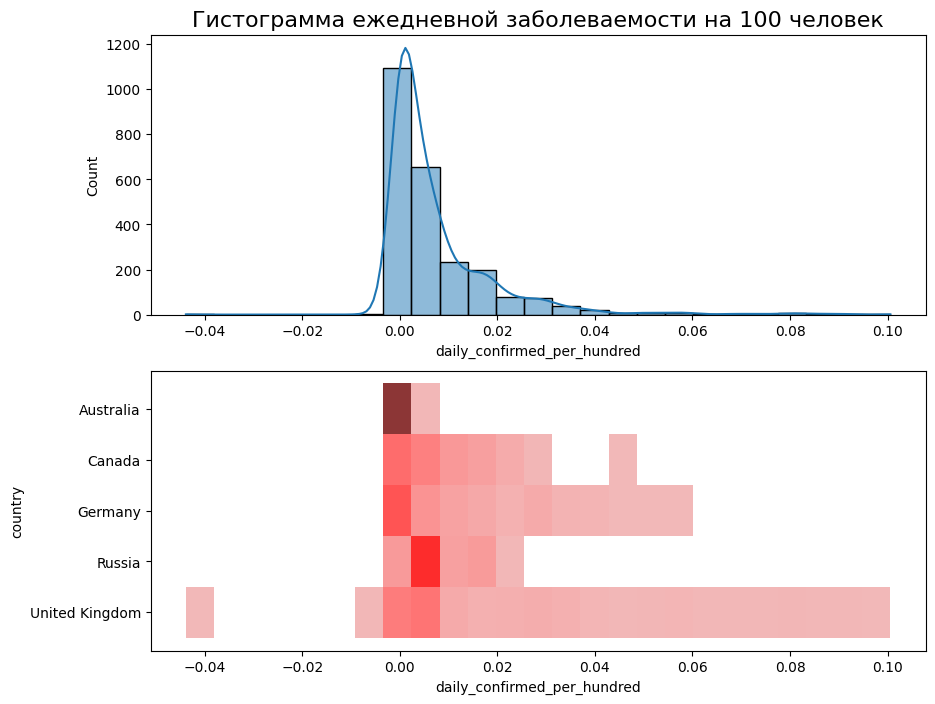

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

sns.histplot(
    data=croped_covid_df,
    x='daily_confirmed_per_hundred',
    bins=25,
    kde=True,
    ax=axes[0]
);
axes[0].set_title('Гистограмма ежедневной заболеваемости на 100 человек', fontsize=16)
sns.histplot(
    data=croped_covid_df,
    x='daily_confirmed_per_hundred',
    y='country',
    bins=25,
    color='red',
    ax=axes[1]
);

Общая гистограмма показывает, что ежедневная заболеваемость в выбранных странах не превышает 0.1 % от общего количества населения, причём большая часть наблюдений сосредоточена около 0.

Также отчётливо видны аномалии — маленькие «пеньки», где заболеваемость отрицательная.

Гистограмма по странам показывает, какой вклад в общее распределение вносит заболеваемость в каждой из стран по отдельности. Например, ясно, что пик около нуля на общей гистограмме в основном задаётся Австралией, так как в ней ежедневная заболеваемость не превышала 0.005 % от общего числа населения (около 1.5 тыс. человек в день) и все наблюдения сосредоточены в двух интервалах. Чуть больший разброс по числу фиксируемых в день случаев имеет Россия, затем идут Канада, Германия и Великобритания.

Отличительной особенностью распределения для России и Великобритании является то, что для них характерен больший процент заболевших (самая тёмная отметка находится правее, чем у других стран).

Наконец, видно, что аномальная отрицательная заболеваемость принадлежит Великобритании. Об аномалиях, их поиске как с помощью визуализации, так и иными методами мы ещё будем говорить в модуле по очистке данных.

Построим коробчатые диаграммы признака летальности (death_rate), который вы создавали ранее

Коробчатые диаграммы в seaborn строятся с помощью метода boxplot().
Ящики отразим горизонтально (для этого по оси x отложим признак летальности, а по оси y - страны), параметр orient отвечает за ориентацию диаграммы, а width - за ширину коробок:


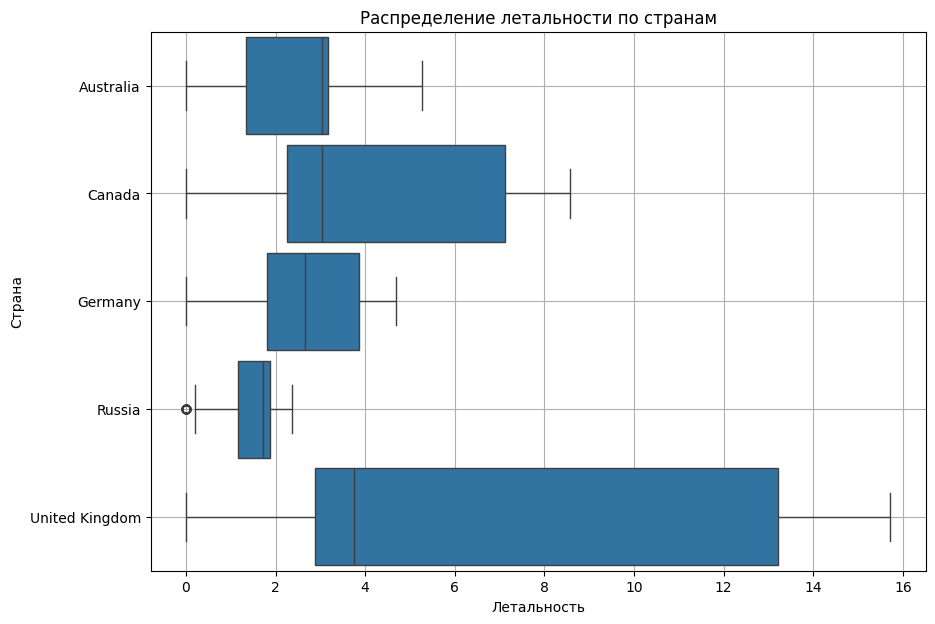

In [ ]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=croped_covid_df,
    y='country',
    x='death_rate',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение летальности по странам');
boxplot.set_xlabel('Летальность');
boxplot.set_ylabel('Страна');
boxplot.grid()

Из выделенных стран наиболее стабильная во времени летальность от коронавируса — в России (ширина ящика наименьшая), она же является самой низкой (наименьшая медиана). Наибольший разброс имеет процент смертей в Великобритании, что объясняется вирусологами и британскими СМИ как неподготовленность страны к эпидемии в её начале, что приводило к высокой летальности. Однако, судя по тому что медианное значение летальности в стране практически совпадает со всеми остальными, можно сказать, что со временем обстановка стабилизировалась.

А теперь рассмотрим пример многоуровневой столбчатой диаграммы. С помощью нее мы можем, например, посмотреть на средний ежедневный процент заболевших в странах по кварталам.

Для построения столбчатых диаграмм в seaborn используется метод barplot(). По умолчанию метод отображает среднее по столбцу, который указан в параметре x (вместо среднего можно вычислить и любую другую статистическую характеристику, наименование которой задается в параметре estimator). Для добавления многоуровневости используется параметр hue, который позволяет группировать данные по признаку


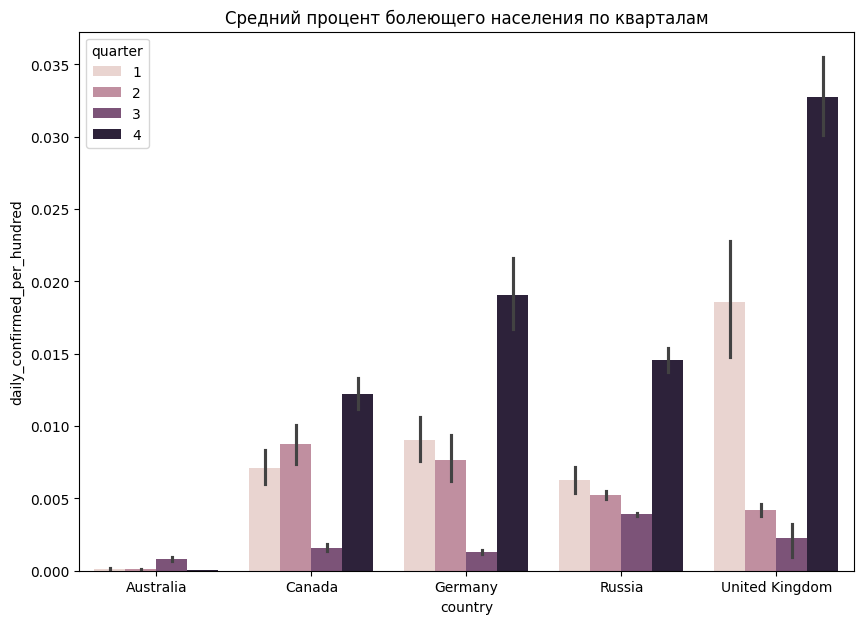

In [ ]:
fig = plt.figure(figsize=(10, 7))
croped_covid_df['quarter'] = croped_covid_df['date'].dt.quarter
barplot = sns.barplot(
    data=croped_covid_df,
    x='country',
    y='daily_confirmed_per_hundred',
    hue='quarter',
)
barplot.set_title('Средний процент болеющего населения по кварталам');


Диаграмма показывает, как зависит средний ежедневный процент заболевших от страны и квартала. Отчётливо видно, что во всех странах (кроме Австралии), большинство людей заболевают в четвёртом квартале (октябрь, ноябрь, декабрь), когда иммунитет особенно ослаблен, а наименьшее число заболевших соответствует третьему кварталу (июль, август, сентябрь).

Когда мы хотим сравнить скорость изменения показателей по малому количеству категорий (в данном случае по странам их у нас их всего 5) нагляднее всего будет тепловая карта.

Предварительно создадим сводную таблицу: по столбцам отложим признак даты, а по строкам - страны, в ячейках таблицы будет находиться процент вакцинированных людей (1 ым компонентом) в стране на определенный день. Для того, чтобы даты отображались на тепловой карте верно, их необходимо привести к типу "string".


In [ ]:
pivot = croped_covid_df.pivot_table(
    values='people_vaccinated_per_hundred',
    columns='date',
    index='country',
)
pivot.columns = pivot.columns.astype('string')
pivot

date,2020-12-13,2020-12-14,2020-12-15,2020-12-16,2020-12-17,2020-12-18,2020-12-19,2020-12-20,2020-12-21,2020-12-22,...,2021-05-20,2021-05-21,2021-05-22,2021-05-23,2021-05-24,2021-05-25,2021-05-26,2021-05-27,2021-05-28,2021-05-29
country,,,,,,,,,,,,,,,,,,,,,
Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,12.40,12.69,12.88,13.28,13.73,14.18
Canada,NaN,0.0,0.00,0.01,0.02,0.03,0.03,0.03,0.05,0.07,...,48.10,49.25,50.14,50.89,51.77,52.39,53.05,53.95,54.99,55.71
Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39.18,39.68,39.95,40.11,40.29,40.64,41.29,41.87,42.40,42.61
Russia,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,NaN,0.04,...,10.20,10.30,10.50,10.53,10.70,10.81,11.07,11.12,11.19,11.29
United Kingdom,0.13,NaN,NaN,NaN,NaN,NaN,NaN,0.99,NaN,NaN,...,55.01,55.33,55.63,55.82,55.99,56.27,56.61,56.99,57.29,57.56


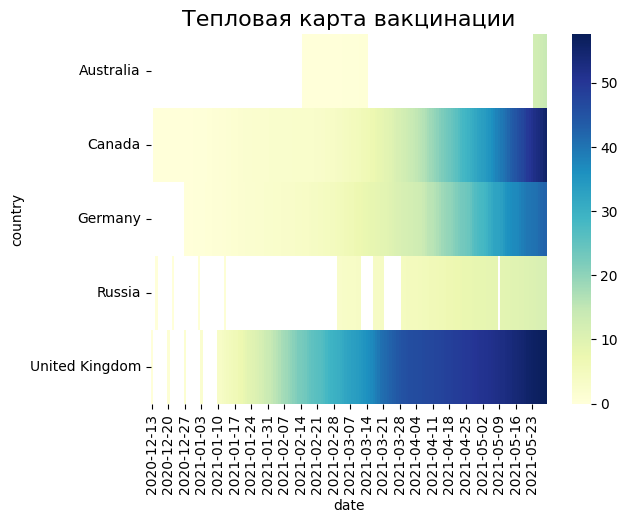

In [ ]:
# Для построения тепловой карты в seaborn используется метод heatmap(). Данный метод работает с табличными данными и
# визуализирует все ячейки таблицы с помощью цвета. Параметр cmap за цветовую гамму графика.

heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')
heatmap.set_title('Тепловая карта вакцинации', fontsize=16);


По тепловой карте легко можно понять, в каких странах темпы вакцинации выше, а в каких — ниже. Согласно легенде справа, чем ближе цвет полосы к синему, тем больше процент вакцинированных людей. Чем быстрее полоса переходит от блёклого жёлтого к насыщенному синему, тем выше темп вакцинации. Белые полосы обозначают отсутствие информации за данный период.

Так, можно судить, что наиболее активно кампания по вакцинации проходила в Великобритании, и на конец периода число вакцинированных первым компонентом людей в стране превысило отметку в 50 % от общего числа населения. В Канаде вакцинация населения вначале проходила медленнее, однако к концу периода наблюдений общий процент вакцинированных первым компонентом сравнялся с Великобританией.

Темпы вакцинации в России и Австралии гораздо ниже: здесь число привитых на конец периода составляет около 10 % от общего числа населения.

При этом с помощью тепловой карты мы смогли увидеть, что в данных о вакцинации в России, Великобритании и Австралии содержатся пропуски, и мы даже можем узнать, за какие периоды, посмотрев на ось абсцисс.

## <center> Графические возможности библиотеки plotly

In [ ]:
# Библиотека plotly является сравнительно новым коммерческим продуктом с бесплатной версией, который создавался специально для Data Science,
#  в отличие от старенького matplotlib, который изначально разрабатывался для научных вычислений.
# Библиотека позволяет строить интерактивные графики, которые можно приближать, отдалять, а также просматривать значения на графике в реальном времени.
# К тому же в библиотеке собрано огромнейшее количество красочных методов визуализации, приятный дизайн и несколько способов работы с ней.
# С помощью plotly можно делать сложные визуализации с элементами управления. Например, строить интерактивную 3D-визуализацию, карту мира и многое другое.

#!pip install plotly
# Plotly позволяет строить графики в нескольких режимах. Мы рассмотрим самый новый и подающий надежды - экспресс режим,
# он имеет чуть меньшую функциональность, чем полный режим plotly, но нам его хватит с головой. Для работы в нем предназначен модуль plotly.express.

import plotly
import plotly.express as px
plotly.__version__

'5.15.0'

С помощью экспресс-режима (px) можно строить уже знакомые нам графики:

* line() — линейные графики;
* histogram() — гистограммы;
* scatter() — диаграммы рассеяния;
* box() — коробчатые диаграммы;
* bar() — столбчатые диаграммы;
* pie() — круговые диаграммы.

Рассмотрим процесс визуализации на примере. Посмотрим, как выглядит линейный график, построенный с помощью метода line() из модуля express. В документации к методу приведено пару десятков параметров этого метода (они схожи с параметрами других методов), приведем основные из них:
* data_frame - ну собственно DataFrame, по которому строим график
* x - признак по оси абсцисс
* y - признак по оси ординат
* height - высота графика
* width - ширина графика
* title - название графика

Построим на рост зафиксированного числа случаев заражения (confirmed), смертей (deaths), выздоровлений(recovered) и активных случаев(active) за все время. Для этого просуммируем статистику по дням и передадим полученный DataFrame в метод line().


In [ ]:
line_data = covid_df.groupby('date', as_index=False).sum()
fig = px.line(
    data_frame=line_data, #датафрейм
    x='date', #ось абсцисс
    y=['confirmed', 'recovered', 'deaths', 'active'], #ось ординат
    height=500, #высота
    width=1000, #ширина
    title='Confirmed, Recovered, Deaths, Active cases over Time' #заголовок
)
fig.show()

Еще пример: построим столбчатую диаграмму показывающую топ 10 стран по среднему проценту выздоравливающих пациентов (recover_rate). Для этого используем метод bar() модуля express. Добавим пару параметров:
* color - группирующий признак, в соответствии с которым будет различная раскраска для столбцов диаграммы
* text - текст, который будет подписан на столбцах диаграммы
* orientation - ориентация графика ('v' - вертикальная, 'h' - горизонтальная)

In [ ]:
#считаем средний процент выздоровлений для каждой страны
bar_data = covid_df.groupby(
    by='country',
    as_index=False
)[['recover_rate']].mean().nlargest(10, columns=['recover_rate'])

#строим график
fig = px.bar(
    data_frame=bar_data, #датафрейм
    x="country", #ось x
    y="recover_rate", #ось y
    color='country', #расцветка в зависимости от страны
    text = 'recover_rate', #текст на столбцах
    orientation='v', #ориентация графика
    height=500, #высота
    width=1000, #ширина
    title='Top 10 Countries for Recovery Rate' #заголовок
)

#отображаем его
fig.show()

Примечание. В полученных данных вы можете увидеть «страну» Diamond Princess. Напомним, что это круизный лайнер, на котором в начале февраля 2020 года выявили заражённого Covid-19, после чего все пассажиры оказались изолированы на судне из-за карантинных мер. Последние пассажиры сошли на берег лишь 1 марта.

А теперь построим что-нибудь новенькое, специфичное для библиотеки plotly. Например график treemap() (древесная или иерархическая диаграмма). Такой график используется для исследования показателя, когда число возможных категорий велико (например, число стран в таблице covid_df).

Основные параметры метода treemap():
* data_frame - ну собственно DataFrame, по которому строим график
* path - категориальные признаки (их может быть несколько), в разрезе которых строится диаграмма
* values - показатель, по которому рассчитываются размеры прямоугольников

Построим иерархическую диаграмму для среднего ежедневного показателя выздоровевших пациентов (daily_recovered) во всех странах.

In [ ]:
#считаем среднюю ежедневную заболеваемость по странам
treemap_data = covid_df.groupby(
    by='country',
    as_index=False
)[['daily_recovered']].mean()

#строим график
fig = px.treemap(
    data_frame=treemap_data, #датафрейм
    path=['country'], #кат. признак, для которого строится график
    values='daily_recovered', #параметр, который сравнивается
    height=500, #высота
    width=700, #ширина
    title='Daily Recovered Cases by Country' #заголовок
)

#отображаем его
fig.show()

С помощью plotly.express можно строить даже анимированные графики. Например, для нашей задачи отлично подойдет график под названием choropleth() (тепловая картограмма) - это тепловая карта, которая строится на географической карте мира. Чтобы показать, как изменяется значение показателя на карте во времени можно добавить анимацию в график.
Отличительные параметры метода choropleth():
* data_frame - ну вы поняли
* locations - название столбца из которого берутся локации (столбец со странами или регионами)
* locationmode - режим геопривязки, определяет как будет производиться сопоставление данных с картой в plotly (возможно сопоставление по название страны - "country_name" - или по её трёхзначному шифру согласно по ее международному стандарту "ISO-3")
* range_color - диапазон изменения цвета
* animation_frame - анимирующий признак, изменяя который мы получаем анимацию
* color_continuous_scale - цветовая палитра



In [ ]:
#преобразуем даты в строки
choropleth_data = covid_df.sort_values(by='date')
choropleth_data['date'] = choropleth_data['date'].astype('string')

#строим график
fig = px.choropleth(
    data_frame=choropleth_data, #датафрейм
    locations="country", #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой plotly
    color="confirmed", #от чего зависит цвет
    animation_frame="date", #анимационный ползунок
    range_color=[0, 30e6],
    title='Global Spread of COVID-19', #заголовок
    width=800, #ширина
    height=500, #высота
    color_continuous_scale='Reds' #палитра цветов
)

#отображаем его
fig.show()

Построим 3D-диаграмму рассеяния, которая покажет, как число ежедневно обнаруживаемых случаев и число ежедневных смертей влияют на желание людей вакцинироваться. Для того, чтобы нам было проще рассматривать диаграмму (точки будут более сгруппированы) построим ее в логарифмическом масштабе по осям абсцисс и ординат.
Для построения такой диаграммы используем метод scatter_3d(). Добавим парочку параметров:
* z - параметр по оси аппликат
* log_x - установка логарифмического масштаба по оси x
* log_y - установка логарифмического масштаба по оси y

Для того, чтобы не захламить график, будем строить зависимость только в нескольких странах: США, России, Великобритании, Бразилии и Франции. Наблюдения для каждой страны окрасим разными цветами.


In [ ]:
#фильтруем таблицу по странам
countries=['United States', 'Russia', 'United Kingdom', 'Brazil', 'France']
scatter_data = covid_df[covid_df['country'].isin(countries)]

#строим график
fig = px.scatter_3d(
    data_frame=scatter_data, #датафрейм
    x = 'daily_confirmed', #ось абсцисс
    y = 'daily_deaths', #ось ординат
    z = 'daily_vaccinations', #ось аппликат
    color='country', #расцветка в зависимости от страны
    log_x=False,
    log_y=False,
    width=1000,
    height=700
)

#отображаем его
fig.show()
# fig.write_html("plotly/scatter_3d.html")


## Общие рекомендации по созданию визулизаций



* Первое и самое главное правило — график должен быть информативным и понятным. То есть любой человек, взглянув на ваш график, должен понять, что на нём изображено.Для этого всегда подписывайте оси графика или сам график, делайте интервалы между отметками на осях, не используйте слишком много графиков на одной координатной плоскости.

* Одна плоскость — один вид графика. Не стоит смешивать типы визуализации, это делает результат нечитабельным.

* Принцип минимализма: чем проще график, тем лучше — не нужно добавлять сглаживающие кривые, многочисленные подписи, лишние отметки на осях, яркие, отвлекающие внимание цвета, если это не помогает вам донести идею.

* Если тип значений всего один, легенда не нужна.

* Не используйте сложный дизайн там, где это не требуется. Прежде чем строить для презентации 3D-график, подумайте, можно ли обойтись без него.

* Если у вас несколько диаграмм, используйте единую цветовую гамму.

* Время всегда указывается по горизонтальной оси слева направо. Размещайте отметки времени так, чтобы они не сливались друг с другом (например, под углом 45 градусов).

* При построении графиков необходимо отталкиваться от их предназначения: например, не надо строить линейный график на категориальных данных — он не предназначен для этого.